In [ ]:
install.packages("foreign") # foreign 패키지 설치

In [ ]:
install.packages("readxl")

In [3]:
library(foreign) # SPSS 파일 로드
library(dplyr) # 전처리
library(ggplot2) # 시각화
library(readxl) # 엑셀 파일 불러오기

Warning message:
"package 'foreign' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'readxl' was built under R version 3.6.3"

#### 아래 링크를 클릭해 한국복지패널데이터 파일을 다운로드하세요.

[Koweps_hpc10_2015_beta1.sav](http://bit.ly/Koweps_hpc10_2015_v2)  

### 한국 복지 패널 데이터
  - 한국보건사회연구원 발간  
  - 가구의 경제활동을 연구해 정책 지원에 반영할 목적  
  - 2006 ~ 2015년까지 전국에서 7000여 가구를 선정해 매년 추적 조사  
  - 경제활동, 생활실태, 복지욕구 등 수천 개 변수에 대한 정보로 구성 

In [ ]:
# 데이터 불러오기
raw_welfare <- read.spss(file = "./Data/Koweps_hpc10_2015_beta1.sav", to.data.frame = T)
# 복사본 만들기
welfare <- raw_welfare

In [8]:
head(welfare, 3)
# tail(welfare)
# View(welfare)
dim(welfare)
str(welfare)
# summary(welfare)
# • 대규모 데이터는 변수가 많고 변수명이 코드로 되어 있어서 전체 데이터 구조를 한눈에 파악하기 어려움
# • 변수명을 쉬운 단어로 바꾼 후 분석에 사용할 변수들 각각 파악해야 함

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

h10_id,h10_ind,h10_sn,h10_merkey,h_new,h10_cobf,h10_reg5,h10_reg7,h10_din,h10_cin,...,c1007_4aq19,c1007_4aq20,c1007_4aq21,c1007_4aq22,c1007_4aq23,h10_pers_income1,h10_pers_income2,h10_pers_income3,h10_pers_income4,h10_pers_income5
1,1,1,10101,0,NA,1,1,864,864,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
2,1,1,20101,0,NA,1,1,600,600,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
3,1,1,30101,0,NA,1,1,1571,1619,...,NA,NA,NA,NA,NA,NA,1440,NA,0,NA


[1] 16664   957

'data.frame':	16664 obs. of  957 variables:
 $ h10_id          : num  1 2 3 4 4 6 6 6 6 6 ...
 $ h10_ind         : num  1 1 1 1 1 1 1 1 1 1 ...
 $ h10_sn          : num  1 1 1 1 1 1 1 1 1 1 ...
 $ h10_merkey      : num  10101 20101 30101 40101 40101 ...
 $ h_new           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ h10_cobf        : num  NA NA NA NA NA NA NA NA NA NA ...
 $ h10_reg5        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ h10_reg7        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ h10_din         : num  864 600 1571 3579 3579 ...
 $ h10_cin         : num  864 600 1619 3687 3687 ...
 $ h10_flag        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ p10_wgl         : num  777 960 1059 1012 1075 ...
 $ p10_wsl         : num  0.257 0.317 0.35 0.334 0.355 ...
 $ p10_wgc         : num  764 949 1048 992 1057 ...
 $ p10_wsc         : num  0.252 0.314 0.346 0.328 0.349 ...
 $ h10_hc          : num  2 2 1 1 1 1 1 1 1 1 ...
 $ nh1001_1        : num  NA NA NA NA NA NA NA NA NA NA ...
 $ nh1001_2        : num  NA NA NA NA NA NA NA

In [9]:
# 변수명 바꾸기
welfare <- rename(welfare,
                     sex = h10_g3, # 성별
                     birth = h10_g4, # 태어난 연도
                     marriage = h10_g10, # 혼인 상태
                     religion = h10_g11, # 종교
                     income = p1002_8aq1, # 월급
                     code_job = h10_eco9, # 직종 코드
                     code_region = h10_reg7) # 지역 코드

데이터 분석 절차  
• 1단계. 변수 검토 및 전처리  
• 2단계. 변수 간 관계 분석  

성별에 따른 월급 차이  
- "성별에 따라 월급이 다를까?"  

분석 절차  
1. 변수 검토 및 전처리  
• 성별  
• 월급  
2. 변수 간 관계 분석  
• 성별 월급 평균표 만들기  
• 그래프 만들기  

In [11]:
# 성별 변수 검토 및 전처리
# 1. 변수 검토하기
class(welfare$sex)
table(welfare$sex)

[1] "numeric"


   1    2 
7578 9086 

In [12]:
# 2. 전처리
# 이상치 확인
table(welfare$sex)


   1    2 
7578 9086 

In [13]:
# 이상치 결측 처리
welfare$sex <- ifelse(welfare$sex == 9, NA, welfare$sex)

In [14]:
# 결측치 확인
table(is.na(welfare$sex))


FALSE 
16664 

In [15]:
# 성별 항목 이름 부여
welfare$sex <- ifelse(welfare$sex == 1, "male", "female")
table(welfare$sex)


female   male 
  9086   7578 

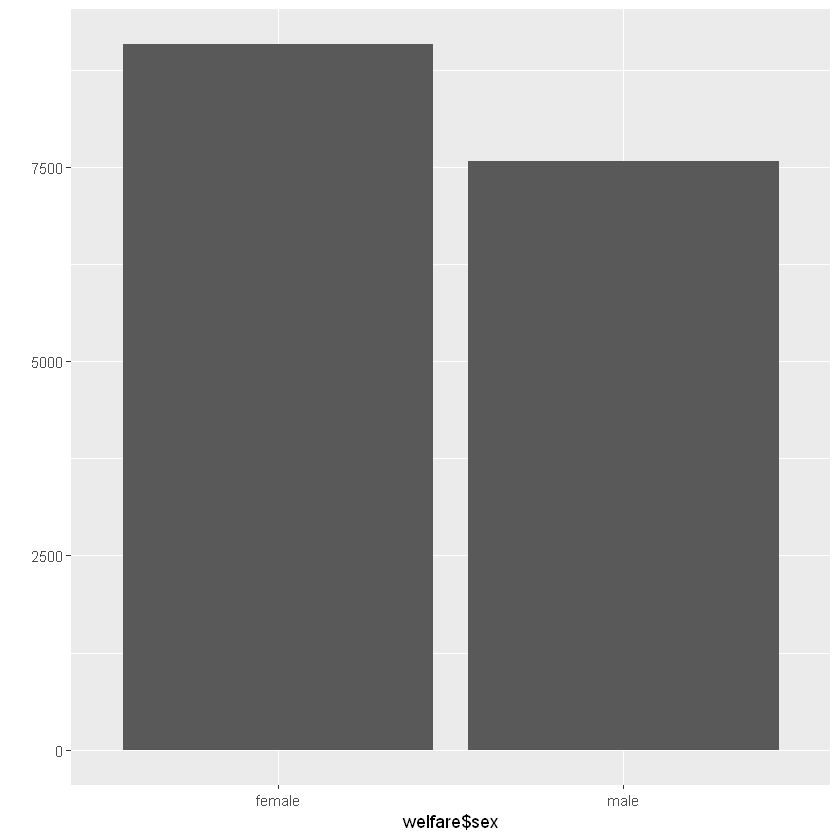

In [16]:
qplot(welfare$sex)

In [17]:
# 월급 변수 검토 및 전처리
# 1. 변수 검토하기
class(welfare$income)

[1] "numeric"

In [18]:
summary(welfare$income)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0   122.0   192.5   241.6   316.6  2400.0   12030 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 12030 rows containing non-finite values (stat_bin)."

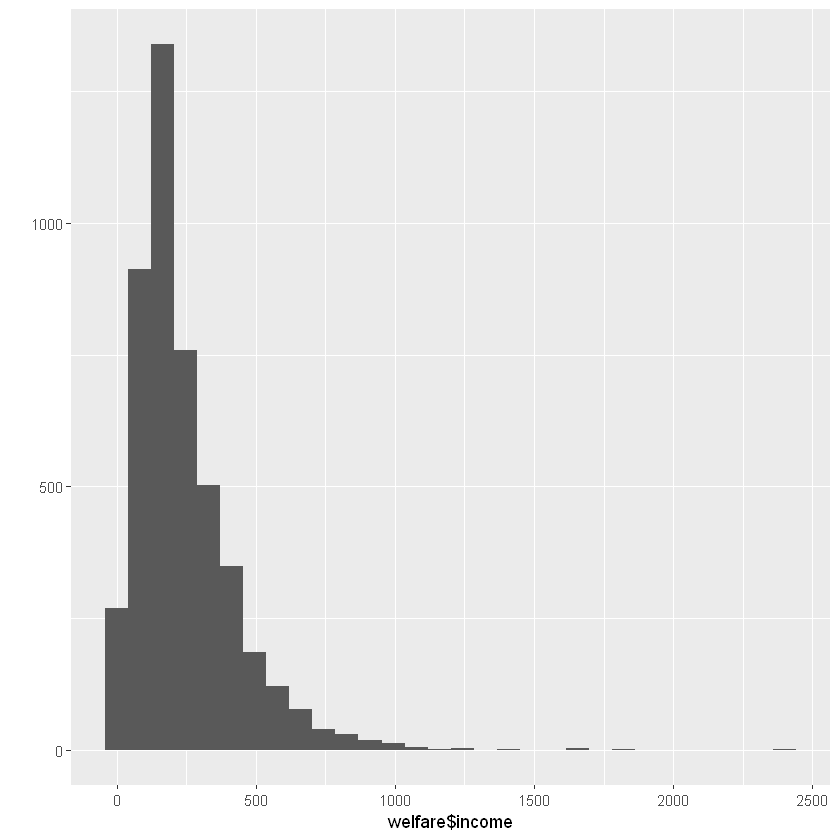

In [19]:
qplot(welfare$income)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 12051 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."

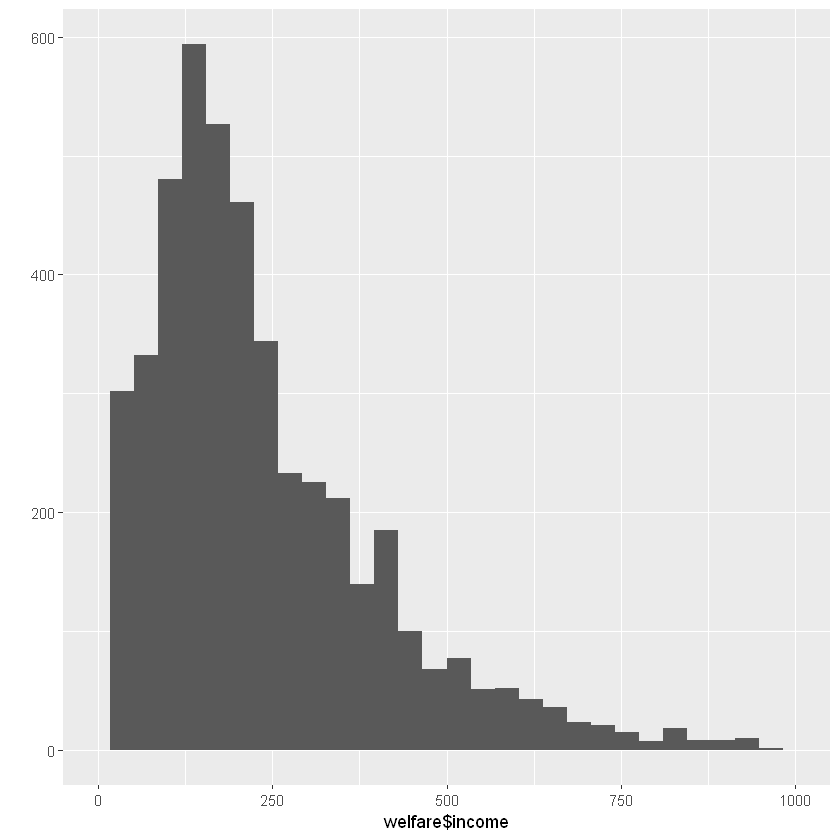

In [20]:
qplot(welfare$income) + xlim(0, 1000)

In [35]:
# 2. 전처리
# 이상치 확인
summary(welfare$income)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0   122.0   192.5   241.6   316.6  2400.0   12030 

In [21]:
# 이상치 결측 처리
welfare$income <- ifelse(welfare$income %in% c(0, 9999), NA, welfare$income)

In [22]:
# 결측치 확인
table(is.na(welfare$income))


FALSE  TRUE 
 4620 12044 

In [23]:
# 성별에 따른 월급 차이 분석하기
# 1. 성별 월급 평균표 만들기
sex_income <- welfare %>%
                 filter(!is.na(income)) %>%
                 group_by(sex) %>%
                 summarise(mean_income = mean(income))
sex_income

sex,mean_income
female,163.2471
male,312.2932


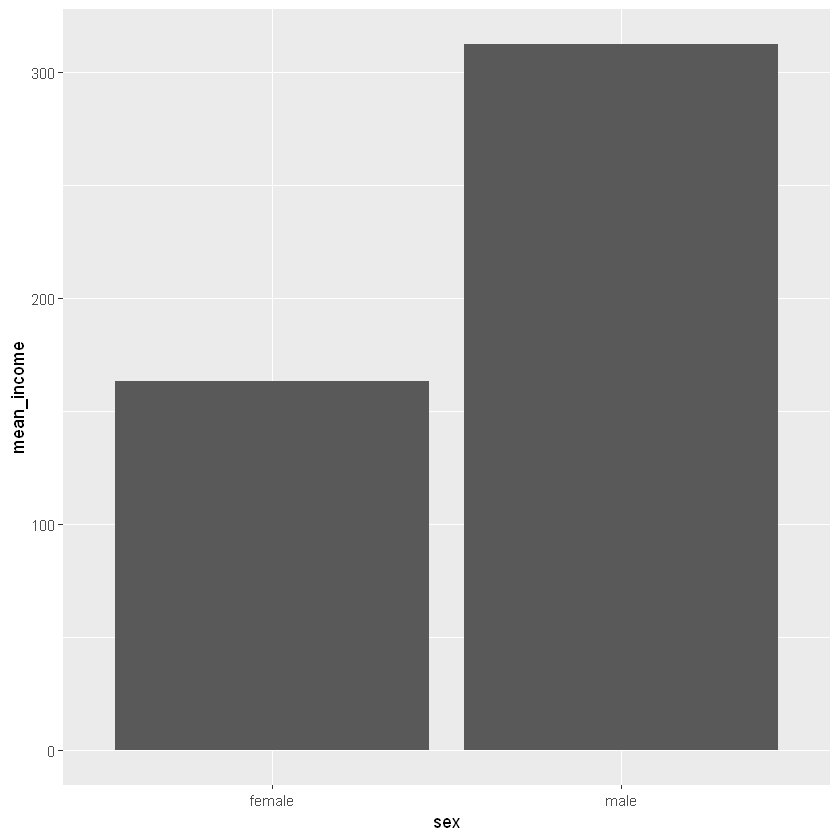

In [24]:
# 2. 그래프 만들기
ggplot(data = sex_income, aes(x = sex, y = mean_income)) + geom_col()

나이와 월급의 관계  
- "몇 살 때 월급을 가장 많이 받을까?"  
분석 절차  
1. 변수 검토 및 전처리  
• 나이  
• 월급  
2. 변수 간 관계 분석  
• 나이에 따른 월급 평균표 만들기  
• 그래프 만들기  

In [25]:
# 1. 변수 검토하기
class(welfare$birth)

[1] "numeric"

In [26]:
summary(welfare$birth)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1907    1946    1966    1968    1988    2014 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


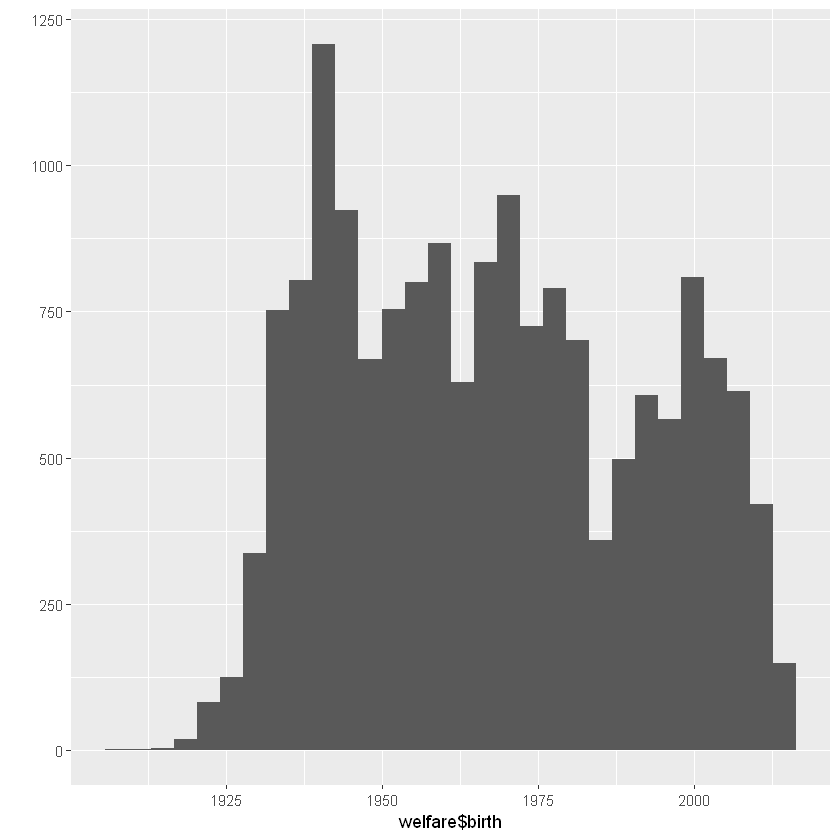

In [27]:
qplot(welfare$birth)

In [ ]:
# 2. 전처리
# 이상치 확인
summary(welfare$birth)

In [28]:
# 결측치 확인
table(is.na(welfare$birth))


FALSE 
16664 

In [29]:
# 이상치 결측 처리
welfare$birth <- ifelse(welfare$birth == 9999, NA, welfare$birth)
table(is.na(welfare$birth))


FALSE 
16664 

In [30]:
# 3. 파생변수 만들기 - 나이
welfare$age <- 2015 - welfare$birth + 1
summary(welfare$age)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00   28.00   50.00   48.43   70.00  109.00 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


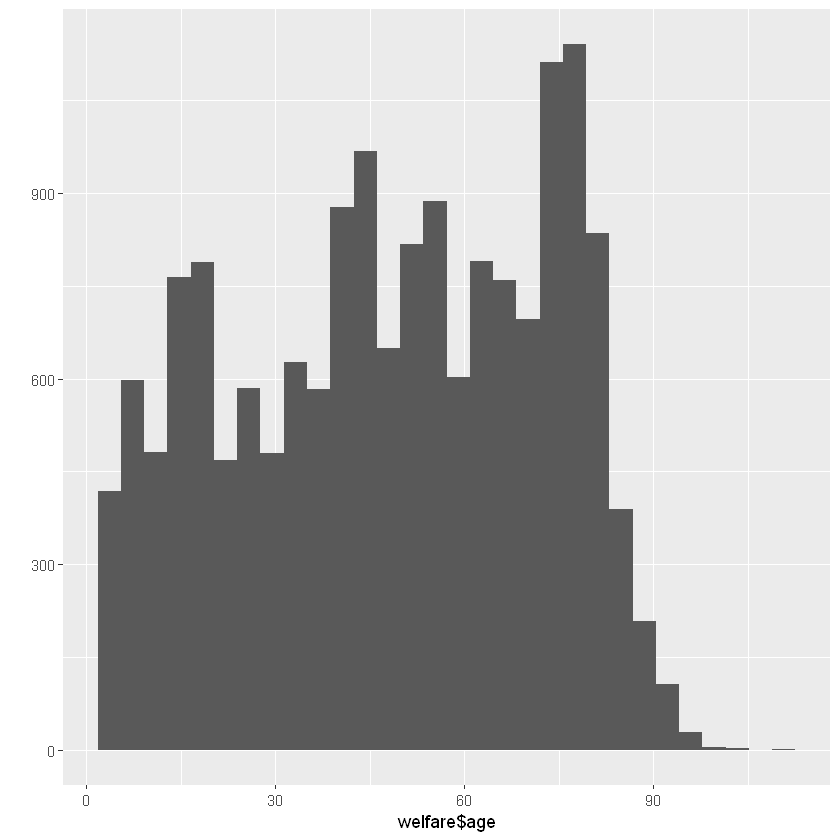

In [31]:
qplot(welfare$age)

In [32]:
# 나이와 월급의 관계 분석하기
# 1. 나이에 따른 월급 평균표 만들기
age_income <- welfare %>%
                 filter(!is.na(income)) %>%
                 group_by(age) %>%
                 summarise(mean_income = mean(income))
head(age_income)

age,mean_income
20,121.3000
21,105.5185
22,130.0923
23,141.7157
24,134.0877
25,144.6559


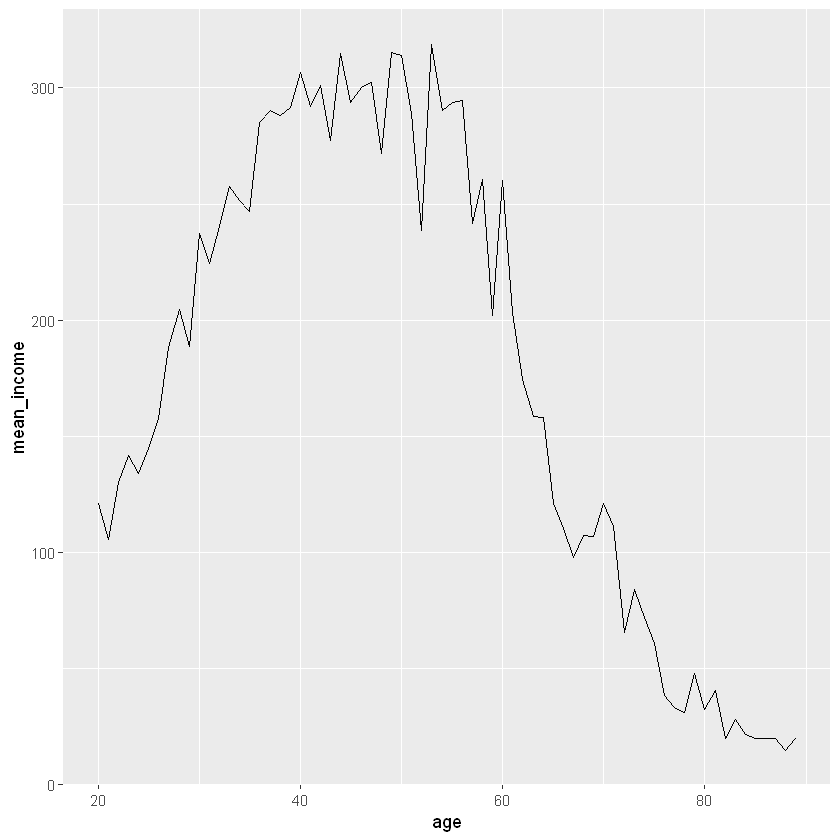

In [33]:
# 2. 그래프 만들기
ggplot(data = age_income, aes(x = age, y = mean_income)) + geom_line()

연령대에 따른 월급 차이  
- "어떤 연령대의 월급이 가장 많을까?"  
분석 절차  
1. 변수 검토 및 전처리  
• 연령대  
• 월급  
2. 변수 간 관계 분석  
• 연령대별 월급 평균표 만들기  
• 그래프 만들기  

In [34]:
# 연령대 변수 검토 및 전처리하기
# 파생변수 만들기 - 연령대
welfare <- welfare %>%
             mutate(ageg = ifelse(age < 30, "young",
                           ifelse(age <= 59, "middle", "old")))
table(welfare$ageg)


middle    old  young 
  6049   6281   4334 

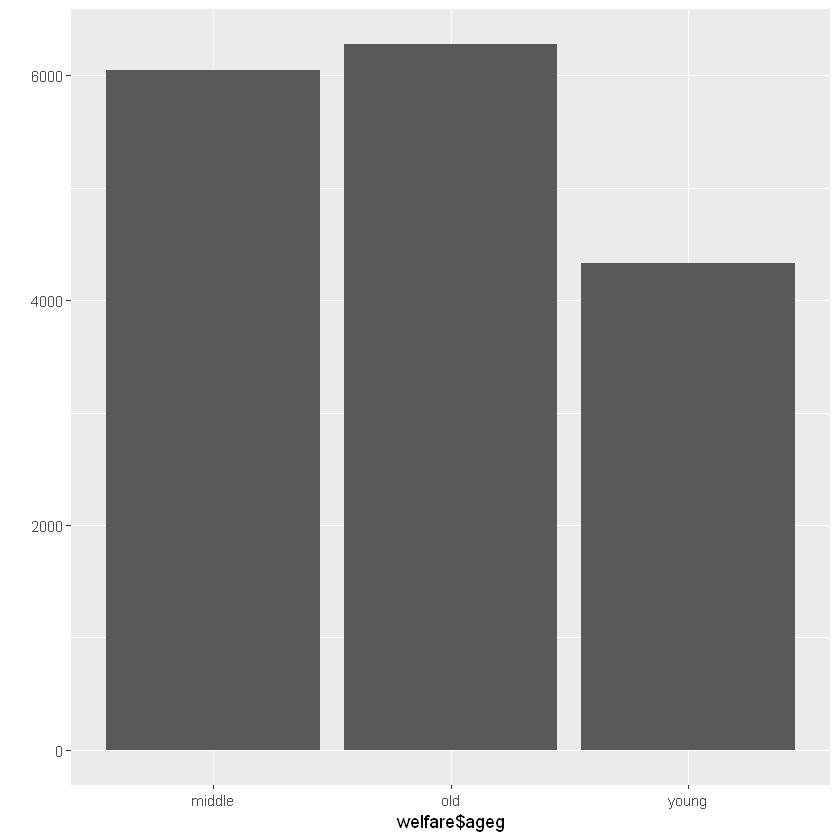

In [35]:
qplot(welfare$ageg)

In [36]:
# 연령대에 따른 월급 차이 분석하기
# 1. 연령대별 월급 평균표 만들기
ageg_income <- welfare %>%
                 filter(!is.na(income)) %>%
                 group_by(ageg) %>%
                 summarise(mean_income = mean(income))
ageg_income

ageg,mean_income
middle,281.8871
old,125.3295
young,163.5953


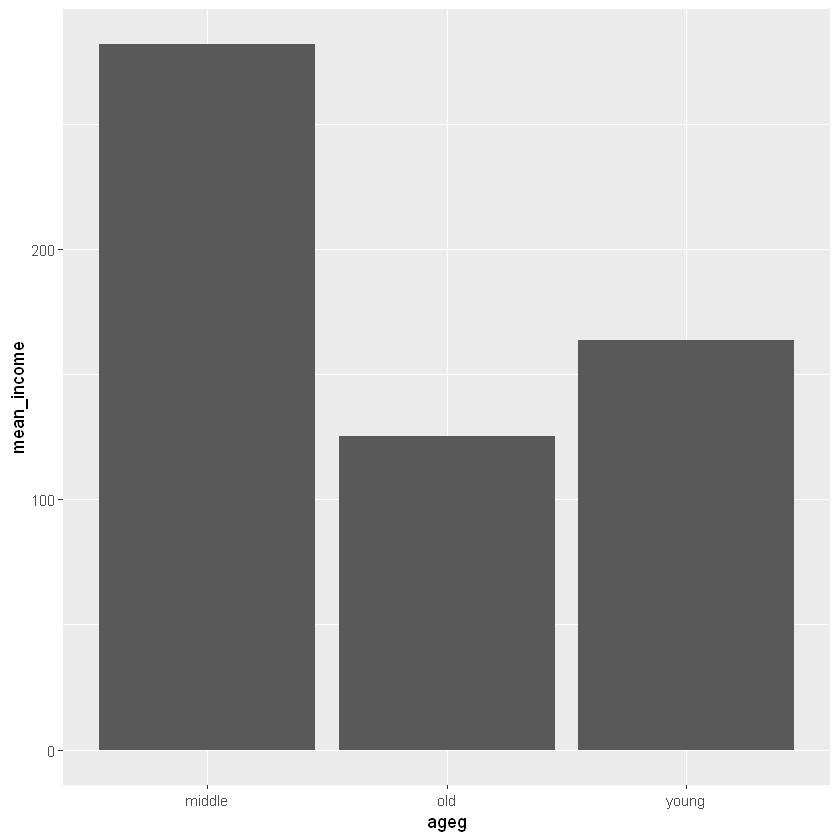

In [37]:
# 2. 그래프 만들기
ggplot(data = ageg_income, aes(x = ageg, y = mean_income)) + geom_col()

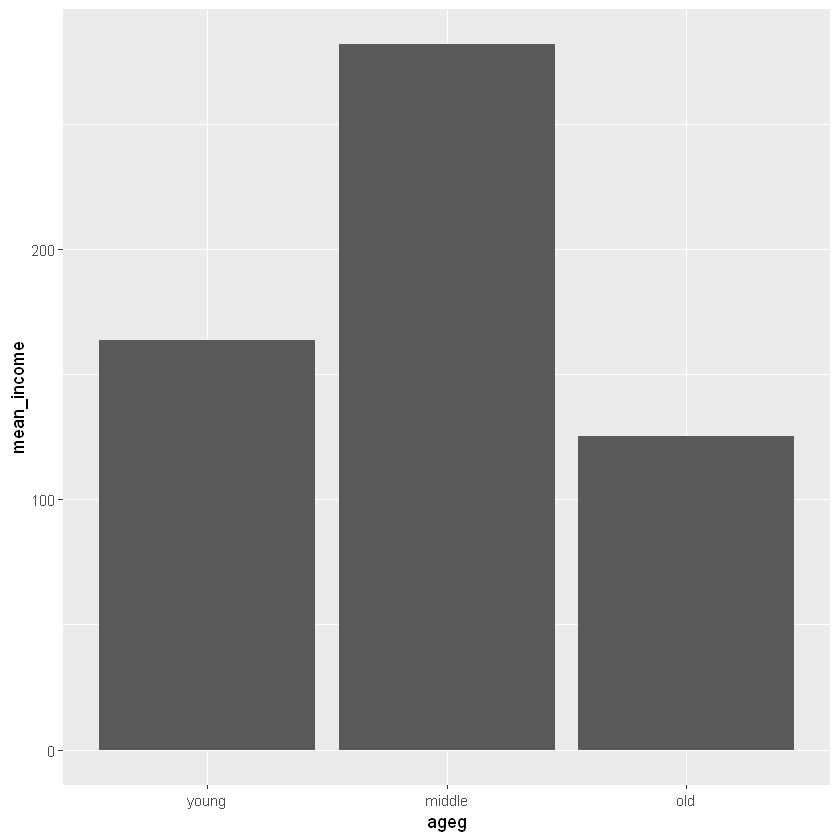

In [38]:
# 막대 정렬 : 초년, 중년, 노년 나이 순
ggplot(data = ageg_income, aes(x = ageg, y = mean_income)) +
             geom_col() +
             scale_x_discrete(limits = c("young", "middle", "old"))

연령대 및 성별 월급 차이  
- "성별 월급 차이는 연령대별로 다를까?"  
분석 절차  
1. 변수 검토 및 전처리  
• 연령대  
• 성별  
• 월급  
2. 변수 간 관계 분석  
• 연령대 및 성별 월급 평균표 만들기  
• 그래프 만들기

In [39]:
# 연령대 및 성별 월급 차이 분석하기
# 1. 연령대 및 성별 월급 평균표 만들기
sex_income <- welfare %>%
                 filter(!is.na(income)) %>%
                 group_by(ageg, sex) %>%
                 summarise(mean_income = mean(income))
sex_income

ageg,sex,mean_income
middle,female,187.97552
middle,male,353.07574
old,female,81.52917
old,male,173.85558
young,female,159.50518
young,male,170.81737


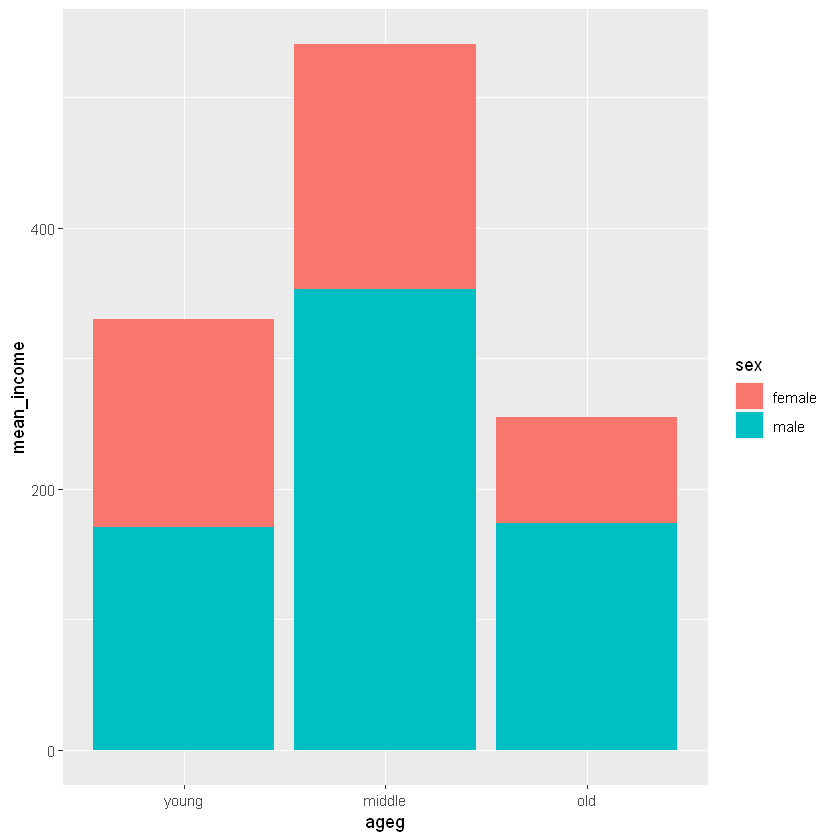

In [40]:
# 2. 그래프 만들기
ggplot(data = sex_income, aes(x = ageg, y = mean_income, fill = sex)) +
                 geom_col() +
                 scale_x_discrete(limits = c("young", "middle", "old"))

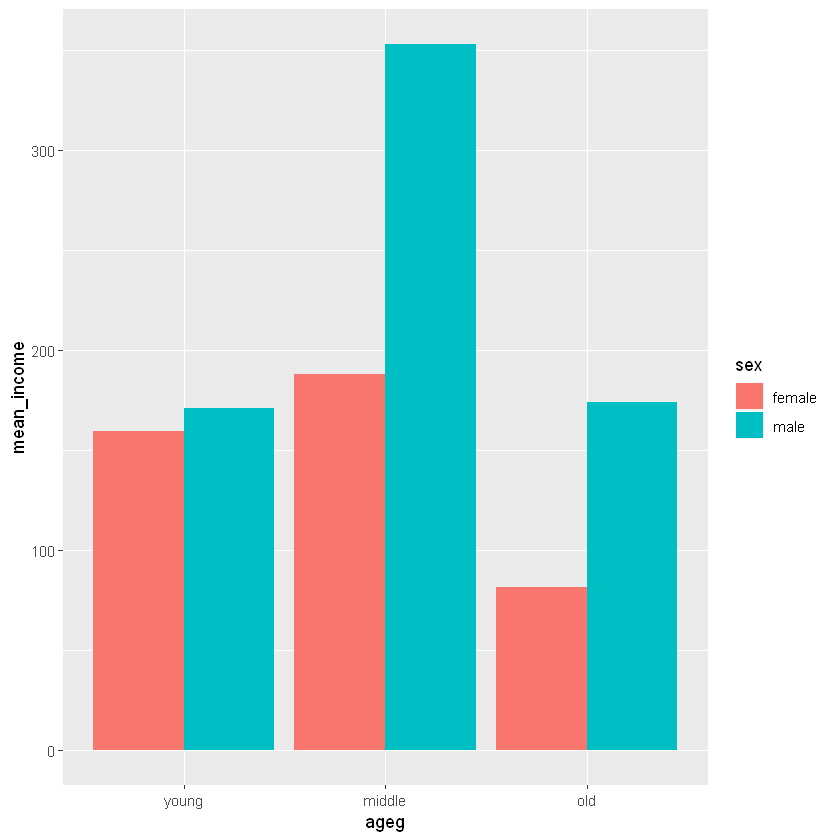

In [32]:
# 성별 막대 분리
ggplot(data = sex_income, aes(x = ageg, y = mean_income, fill = sex)) +
             geom_col(position = "dodge") +
             scale_x_discrete(limits = c("young", "middle", "old"))

In [41]:
# 나이 및 성별 월급 차이 분석하기
# 성별 연령별 월급 평균표 만들기
sex_age <- welfare %>%
                 filter(!is.na(income)) %>%
                 group_by(age, sex) %>%
                 summarise(mean_income = mean(income))
head(sex_age)

age,sex,mean_income
20,female,147.4500
20,male,69.0000
21,female,106.9789
21,male,102.0500
22,female,139.8547
22,male,118.2379


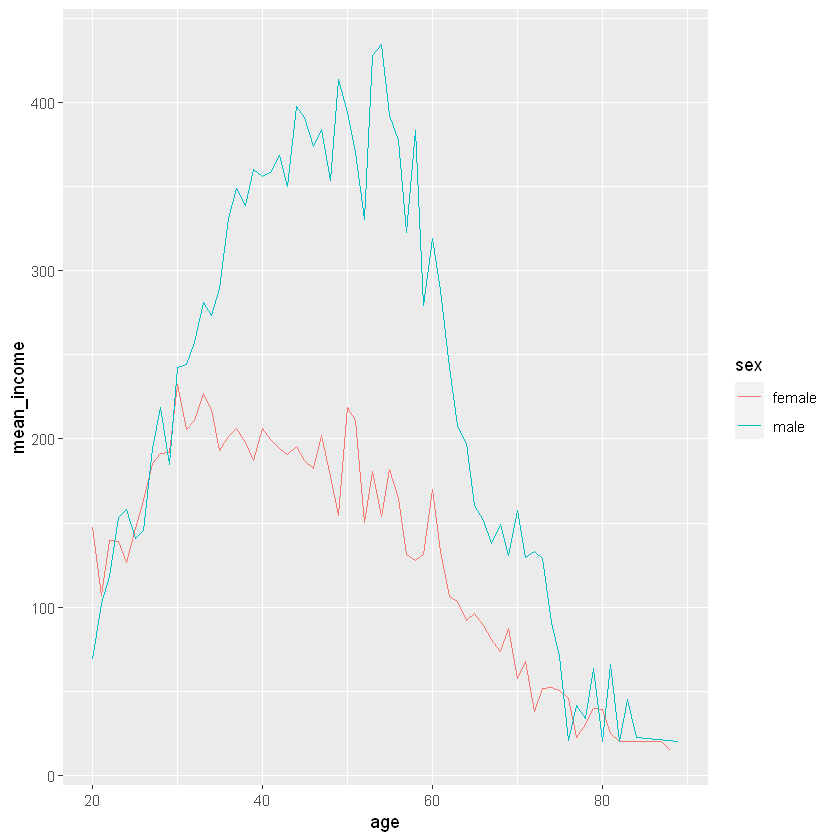

In [43]:
# 2. 그래프 만들기
ggplot(data = sex_age, aes(x = age, y = mean_income, col = sex)) + geom_line()

직업별 월급 차이  
- "어떤 직업이 월급을 가장 많이 받을까?"  
분석 절차  
1. 변수 검토 및 전처리  
• 직업  
• 월급  
2. 변수 간 관계 분석  
• 직업별 월급 평균표 만들기  
• 그래프 만들기  

In [35]:
# 1. 변수 검토하기
class(welfare$code_job)

[1] "numeric"

In [ ]:
table(welfare$code_job)

In [37]:
# 2. 전처리
# 직업분류코드 목록 불러오기
library(readxl)
list_job <- read_excel("./Data/Koweps_Codebook.xlsx", col_names = T, sheet = 2)
head(list_job)

code_job,job
111,의회의원 고위공무원 및 공공단체임원
112,기업고위임원
120,행정 및 경영지원 관리자
131,연구 교육 및 법률 관련 관리자
132,보험 및 금융 관리자
133,보건 및 사회복지 관련 관리자


In [38]:
dim(list_job)

[1] 149   2

In [39]:
# welfare에 직업명 결합
welfare <- left_join(welfare, list_job, id = "code_job")
## Joining, by = "code_job"
welfare %>%
 filter(!is.na(code_job)) %>%
 select(code_job, job) %>%
 head(10)

Joining, by = "code_job"


code_job,job
942,경비원 및 검표원
762,전기공
530,방문 노점 및 통신 판매 관련 종사자
999,기타 서비스관련 단순 종사원
312,경영관련 사무원
254,문리 기술 및 예능 강사
510,영업 종사자
530,방문 노점 및 통신 판매 관련 종사자
286,스포츠 및 레크레이션 관련 전문가
521,매장 판매 종사자


In [40]:
# 직업별 월급 차이 분석하기
# 1. 직업별 월급 평균표 만들기
job_income <- welfare %>%
 filter(!is.na(job) & !is.na(income)) %>%
 group_by(job) %>%
 summarise(mean_income = mean(income))
head(job_income)

job,mean_income
가사 및 육아 도우미,80.16648
간호사,240.68127
건설 및 광업 단순 종사원,190.12974
건설 및 채굴 기계운전원,357.97000
건설 전기 및 생산 관련 관리자,535.80556
건설관련 기능 종사자,246.63214


In [42]:
# 2. 상위 10개 추출
top10 <- job_income %>%
 arrange(desc(mean_income)) %>%
 head(10)
top10

job,mean_income
금속 재료 공학 기술자 및 시험원,845.0667
의료진료 전문가,843.6429
의회의원 고위공무원 및 공공단체임원,750.0000
보험 및 금융 관리자,726.1800
제관원 및 판금원,572.4067
행정 및 경영지원 관리자,563.7633
문화 예술 디자인 및 영상 관련 관리자,557.4667
연구 교육 및 법률 관련 관리자,549.9125
건설 전기 및 생산 관련 관리자,535.8056
석유 및 화학물 가공장치 조작원,531.6600


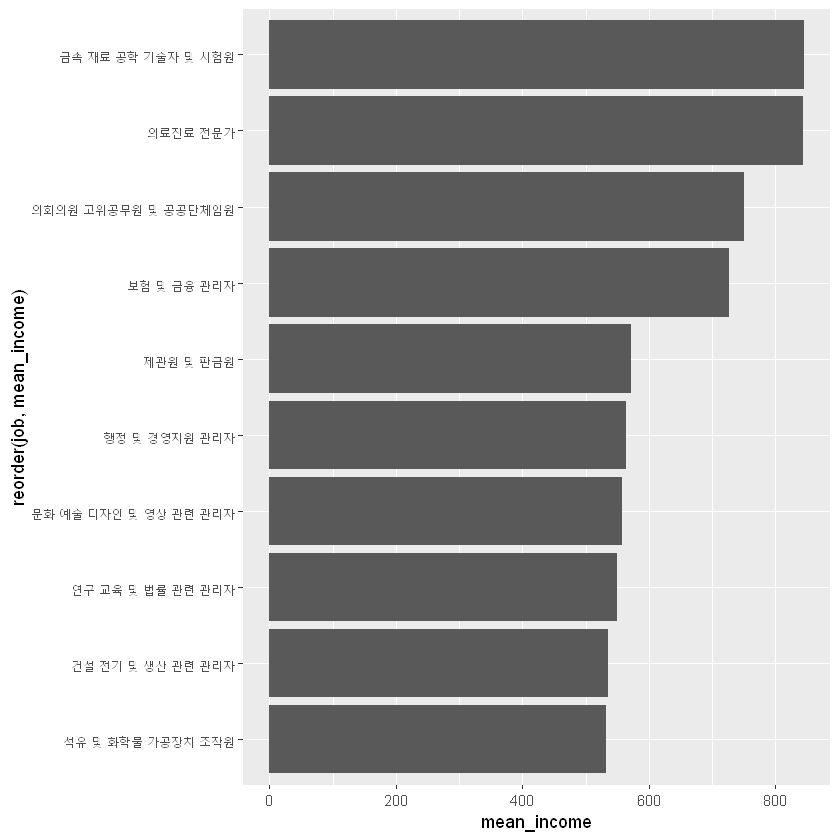

In [43]:
# 3. 그래프 만들기
ggplot(data = top10, aes(x = reorder(job, mean_income), y = mean_income)) +
 geom_col() +
 coord_flip()

In [44]:
# 4. 하위 10위 추출
bottom10 <- job_income %>%
 arrange(mean_income) %>%
 head(10)
bottom10

job,mean_income
가사 및 육아 도우미,80.16648
임업관련 종사자,83.33000
기타 서비스관련 단순 종사원,88.22101
청소원 및 환경 미화원,88.78775
약사 및 한약사,89.00000
작물재배 종사자,92.00000
농립어업관련 단순 종사원,101.58125
의료 복지 관련 서비스 종사자,103.52643
음식관련 단순 종사원,107.84511
판매관련 단순 종사원,116.82203


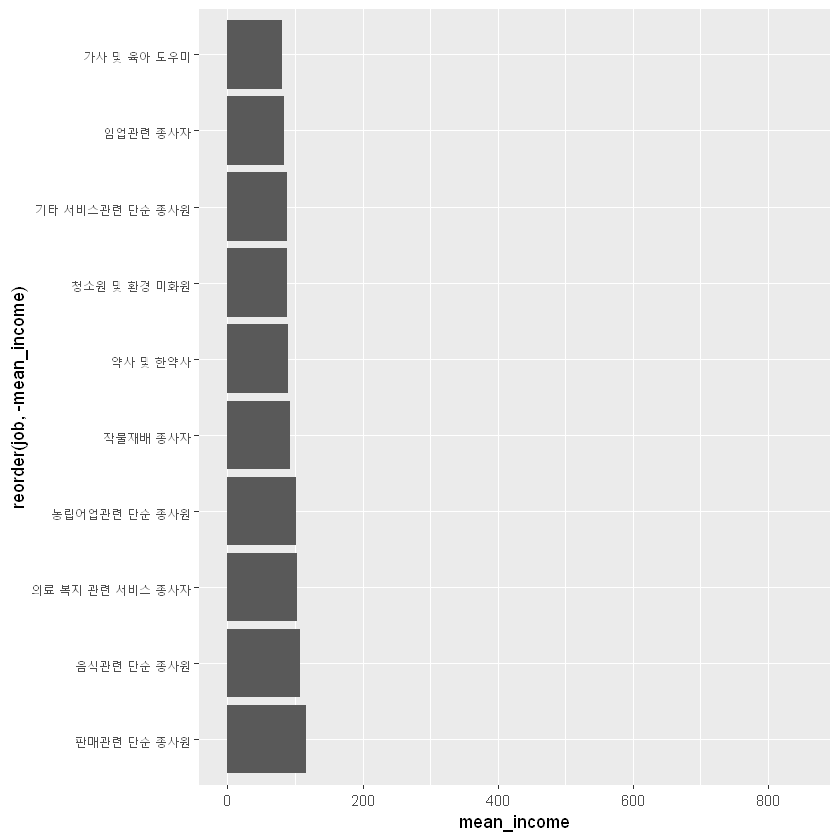

In [45]:
# 5. 그래프 만들기
ggplot(data = bottom10, aes(x = reorder(job, -mean_income),
 y = mean_income)) +
 geom_col() +
 coord_flip() +
 ylim(0, 850)

성별 직업 빈도  
- "성별로 어떤 직업이 가장 많을까?"  
분석 절차  
1. 변수 검토 및 전처리  
• 성별  
• 직업  
2. 변수 간 관계 분석  
• 성별 직업 빈도표 만들기  
• 그래프 만들기  

In [46]:
# 성별 직업 빈도 분석하기
# 1. 성별 직업 빈도표 만들기
# 남성 직업 빈도 상위 10 개 추출
job_male <- welfare %>%
 filter(!is.na(job) & sex == "male") %>%
 group_by(job) %>%
 summarise(n = n()) %>%
 arrange(desc(n)) %>%
 head(10)
job_male

job,n
작물재배 종사자,640
자동차 운전원,251
경영관련 사무원,213
영업 종사자,141
매장 판매 종사자,132
제조관련 단순 종사원,104
청소원 및 환경 미화원,97
건설 및 광업 단순 종사원,95
경비원 및 검표원,95
행정 사무원,92


In [47]:
# 여성 직업 빈도 상위 10 개 추출
job_female <- welfare %>%
 filter(!is.na(job) & sex == "female") %>%
 group_by(job) %>%
 summarise(n = n()) %>%
 arrange(desc(n)) %>%
 head(10)
job_female

job,n
작물재배 종사자,680
청소원 및 환경 미화원,228
매장 판매 종사자,221
제조관련 단순 종사원,185
회계 및 경리 사무원,176
음식서비스 종사자,149
주방장 및 조리사,126
가사 및 육아 도우미,125
의료 복지 관련 서비스 종사자,121
음식관련 단순 종사원,104


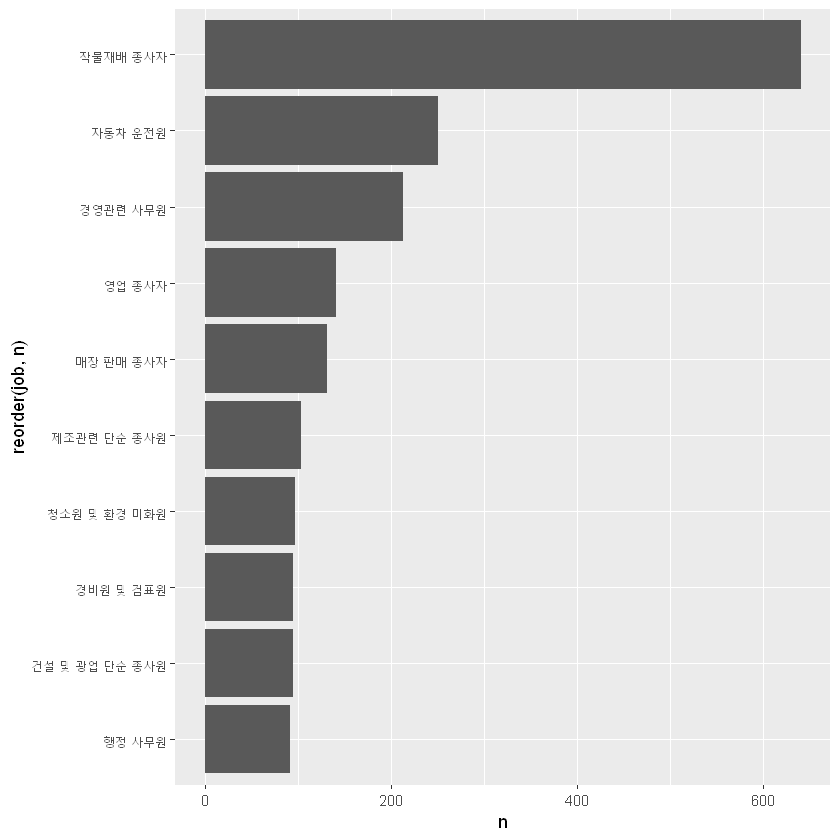

In [48]:
# 2. 그래프 만들기
# 남성 직업 빈도 상위 10 개 직업
ggplot(data = job_male, aes(x = reorder(job, n), y = n)) +
 geom_col() +
 coord_flip()

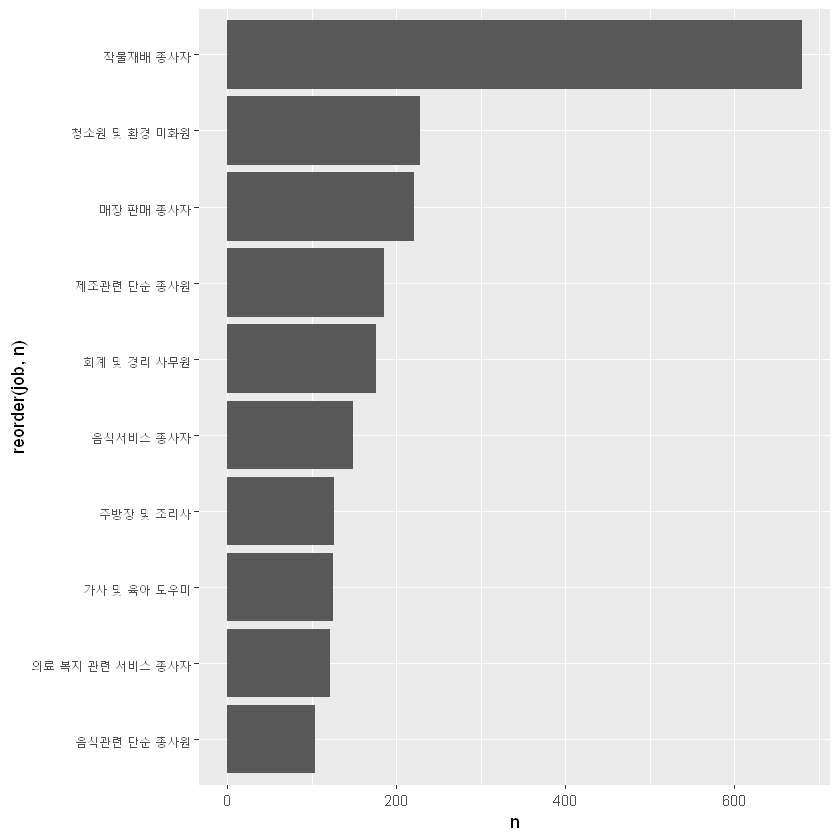

In [49]:
# 여성 직업 빈도 상위 10 개 직업
ggplot(data = job_female, aes(x = reorder(job, n), y = n)) +
 geom_col() +
 coord_flip()

지역별 연령대 비율  
- "노년층이 많은 지역은 어디일까?"  
분석 절차  
1. 변수 검토 및 전처리  
• 지역  
• 연령대  
2. 변수 간 관계 분석  
• 지역별 연령대 비율표 만들기  
• 그래프 만들기  

In [50]:
# 지역 변수 검토 및 전처리하기
# 1. 변수 검토하기
class(welfare$code_region)

[1] "numeric"

In [51]:
table(welfare$code_region)


   1    2    3    4    5    6    7 
2486 3711 2785 2036 1467 1257 2922 

In [52]:
# 2. 전처리
# 지역 코드 목록 만들기
list_region <- data.frame(code_region = c(1:7),
 region = c("서울",
 "수도권(인천/경기)",
 "부산/경남/울산",
 "대구/경북",
 "대전/충남",
 "강원/충북",
 "광주/전남/전북/제주도"))
list_region

code_region,region
1,서울
2,수도권(인천/경기)
3,부산/경남/울산
4,대구/경북
5,대전/충남
6,강원/충북
7,광주/전남/전북/제주도


In [53]:
# welfare에 지역명 변수 추가
welfare <- left_join(welfare, list_region, id = "code_region")

Joining, by = "code_region"


In [54]:
welfare %>%
 select(code_region, region) %>%
 head

code_region,region
1,서울
1,서울
1,서울
1,서울
1,서울
1,서울


In [55]:
# 지역별 연령대 비율 분석하기
# 1. 지역별 연령대 비율표 만들기
region_ageg <- welfare %>%
 group_by(region, ageg) %>%
 summarise(n = n()) %>%
 mutate(tot_group = sum(n)) %>%
 mutate(pct = round(n/tot_group*100, 2))
head(region_ageg)

region,ageg,n,tot_group,pct
강원/충북,middle,417,1257,33.17
강원/충북,old,555,1257,44.15
강원/충북,young,285,1257,22.67
광주/전남/전북/제주도,middle,947,2922,32.41
광주/전남/전북/제주도,old,1233,2922,42.20
광주/전남/전북/제주도,young,742,2922,25.39


In [56]:
# count() 활용
region_ageg <- welfare %>%
 count(region, ageg) %>%
 group_by(region) %>%
 mutate(pct = round(n/sum(n)*100, 2))

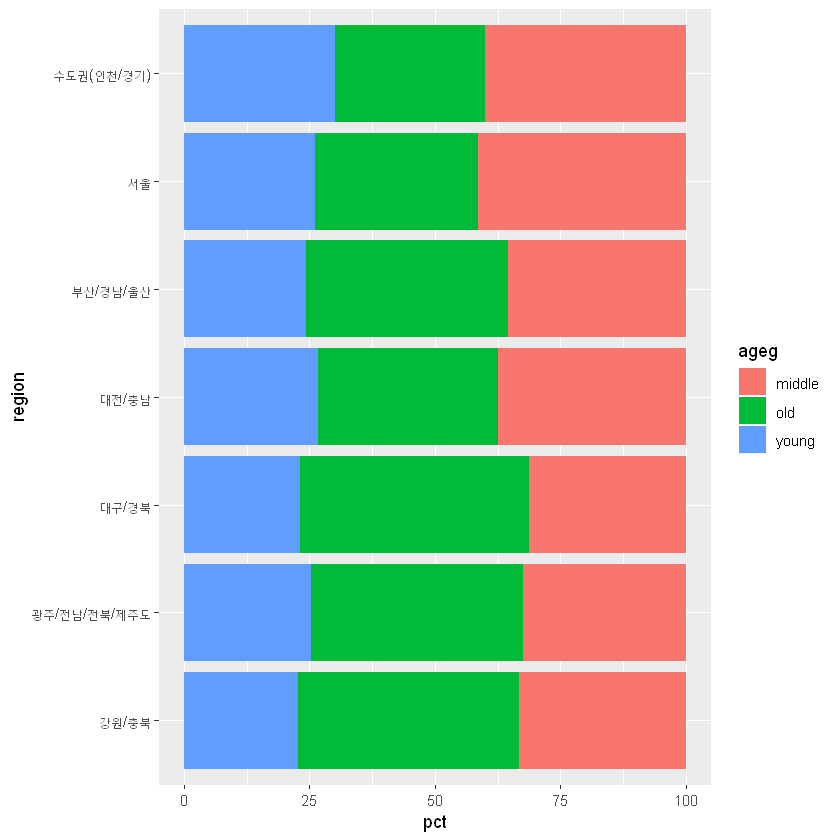

In [57]:
ggplot(data = region_ageg, aes(x = region, y = pct, fill = ageg)) +
 geom_col() +
 coord_flip()